In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.signal as ss

In [2]:
df = pd.read_csv(r"C:\Users\PRAMILA\Downloads\COMBINED\eeg_new_normal.csv",skiprows=6,header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5,-22498.24,-32630.19,-30588.83,-35367.14,-31550.92,-34087.21,-37962.54,1434.58,0.000,0.000,0.000,22:05:57.113,1680152757113
1,6,-22520.19,-32928.97,-30838.25,-35367.48,-31550.63,-34099.86,-37952.39,1431.85,0.006,-0.012,0.768,22:05:57.113,1680152757113
2,7,-22536.03,-33088.67,-31015.44,-35371.32,-31572.22,-34098.08,-37960.68,1428.48,0.000,0.000,0.000,22:05:57.113,1680152757113
3,8,-22524.10,-32991.11,-30945.79,-35370.45,-31574.90,-34089.20,-37958.09,1433.04,0.000,0.000,0.000,22:05:57.113,1680152757113
4,9,-22485.27,-32742.24,-30715.45,-35363.72,-31565.51,-34074.92,-37953.68,1439.09,0.000,0.000,0.000,22:05:57.113,1680152757113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591930,433,-32424.33,-27597.23,-24260.78,-55406.82,-30584.65,0.00,-31761.52,10788.85,0.000,0.000,0.000,22:56:00.560,1680155760560
591931,434,-32370.40,-27177.20,-23879.28,-55410.40,-30572.25,0.00,-31773.16,10786.79,0.000,0.000,0.000,22:56:00.560,1680155760560
591932,435,-32346.35,-27339.02,-24055.86,-55417.97,-30589.17,0.00,-31756.29,10791.82,0.000,0.000,0.000,22:56:00.560,1680155760560
591933,436,-32313.25,-27089.46,-23835.59,-55413.21,-30584.40,0.00,-31751.48,10795.71,0.000,0.000,0.000,22:56:00.576,1680155760576


# PREPROCESSING

In [4]:
df.columns=['index','Fp1','Fp2','C3','C4','P3','P4','O1','O2','acc1','acc2','acc3','time_std','timestamp']
df.drop(['index'],axis=1,inplace=True)

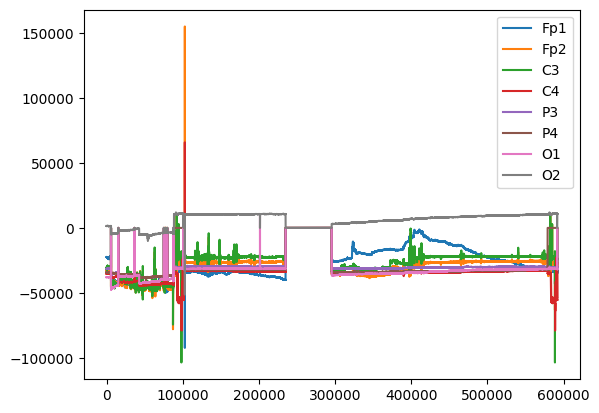

In [5]:
for column in df[['Fp1','Fp2','C3','C4','P3','P4','O1','O2']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')

In [6]:
df['Fp1'] = ss.detrend(df['Fp1'])
df['Fp2'] = ss.detrend(df['Fp2'])
df['C3'] = ss.detrend(df['C3'])
df['C4'] = ss.detrend(df['C4'])
df['P3'] = ss.detrend(df['P3'])
df['P4'] = ss.detrend(df['P4'])
df['O1'] = ss.detrend(df['O1'])
df['O2'] = ss.detrend(df['O2'])

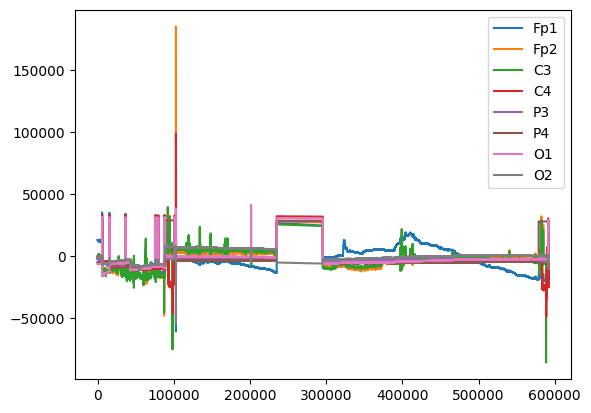

In [7]:
for column in df[['Fp1','Fp2','C3','C4','P3','P4','O1','O2']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')

In [8]:
chan1 = (df['Fp1']-np.mean(df['Fp1']))/np.std(df['Fp1'])
chan2 = (df['Fp2']-np.mean(df['Fp2']))/np.std(df['Fp2'])
chan3 = (df['C3']-np.mean(df['C3']))/np.std(df['C3'])
chan4 = (df['C4']-np.mean(df['C4']))/np.std(df['C4'])
chan5 = (df['P3']-np.mean(df['P3']))/np.std(df['P3'])
chan6 = (df['P4']-np.mean(df['P4']))/np.std(df['P4'])
chan7 = (df['O1']-np.mean(df['O1']))/np.std(df['O1'])
chan8 = (df['O2']-np.mean(df['O2']))/np.std(df['O2'])
df['Fp1'] = chan1
df['Fp2'] = chan2
df['C3'] = chan3
df['C4'] = chan4
df['P3'] = chan5
df['P4'] = chan6
df['O1'] = chan7
df['O2'] = chan8


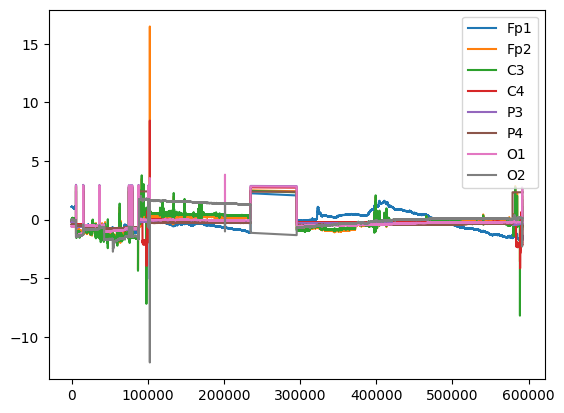

In [9]:
for column in df[['Fp1','Fp2','C3','C4','P3','P4','O1','O2']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')

In [10]:
chan1[np.abs(chan1)>3] = 0
chan2[np.abs(chan2)>3] = 0
chan3[np.abs(chan3)>3] = 0
chan4[np.abs(chan4)>3] = 0
chan5[np.abs(chan5)>3] = 0
chan6[np.abs(chan6)>3] = 0
chan7[np.abs(chan7)>3] = 0
chan8[np.abs(chan8)>3] = 0

In [11]:
df['Fp1'] = chan1
df['Fp2'] = chan2
df['C3'] = chan3
df['C4'] = chan4
df['P3'] = chan5
df['P4'] = chan6
df['O1'] = chan7
df['O2'] = chan8

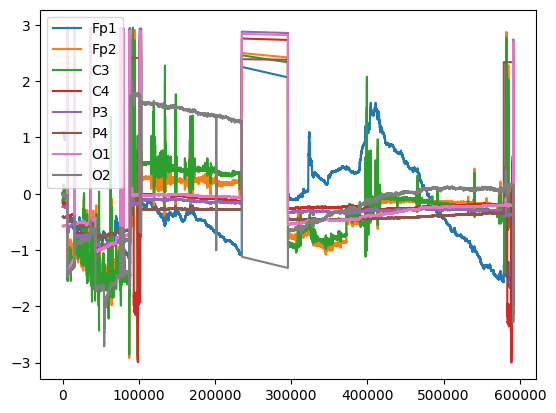

In [12]:
for column in df[['Fp1','Fp2','C3','C4','P3','P4','O1','O2']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')

# montages

In [13]:
#data=df['channel1']+df['channel2']
data=df.iloc[:,0:8]
data

,Fp1,Fp2,C3,C4,P3,P4,O1,O2
0,1.096447,-0.103153,0.017215,-0.167806,-0.232741,-0.411379,-0.574385,-0.023552
1,1.094608,-0.129743,-0.006653,-0.167835,-0.232712,-0.412432,-0.573449,-0.024166
2,1.093280,-0.143957,-0.023610,-0.168164,-0.234906,-0.412284,-0.574214,-0.024924
3,1.094275,-0.135276,-0.016947,-0.168090,-0.235179,-0.411545,-0.573976,-0.023907
4,1.097519,-0.113130,0.005091,-0.167515,-0.234225,-0.410356,-0.573569,-0.022556
...,...,...,...,...,...,...,...,...
591930,-1.555771,-0.411072,-0.594448,-2.128648,-0.366709,2.336237,-0.221563,0.126690
591931,-1.551264,-0.373693,-0.557946,-2.128955,-0.365450,2.336237,-0.222637,0.126226
591932,-1.549255,-0.388096,-0.574844,-2.129603,-0.367170,2.336237,-0.221081,0.127348
591933,-1.546490,-0.365888,-0.553770,-2.129196,-0.366685,2.336237,-0.220637,0.128215


['Fp1', 'Fp2', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']


C:\Users\PRAMILA\AppData\Local\Temp\ipykernel_8140\3289769180.py:38: RuntimeWarning: More than 25 topomaps plots requested. This might take a while.
  evoked.plot_topomap(times=time_range, cmap='RdBu_r', show_names=True, mask=None, mask_params=None,outlines='head', cbar_fmt='%d%%',  contours=0, res=64, show=False,scalings={'eeg': 100})


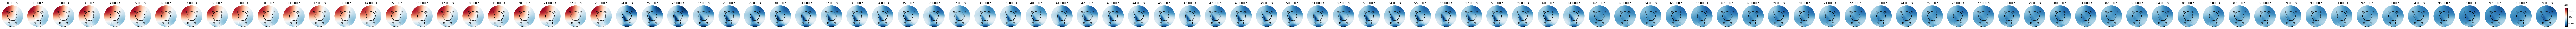

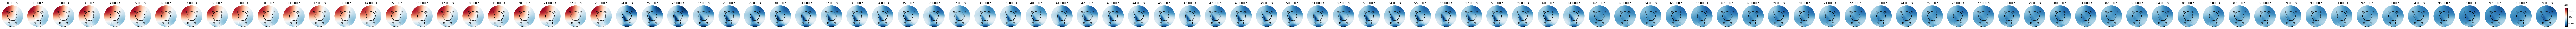

In [14]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt

# Extract EEG data and convert it to a NumPy array
eeg_data = data.values.T

# Create mne.Info object
ch_names = list(data.columns[0:8])  
print(ch_names)
ch_types = ['eeg'] * len(ch_names)
sfreq = 250
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Manually specify electrode positions for 8 channels in the 10-20 system
montage_pos = {
    'Fp1': [-0.1, 0.09, 0],
    'Fp2': [0.1, 0.09, 0],
    'C3': [-0.04, -0.09, 0],
    'C4': [0.04, -0.09, 0],
    'P3': [-0.07, -0.15, 0],
    'P4': [0.07, -0.15, 0],
    'O1': [-0.04, -0.22, 0],
    'O2': [0.04, -0.22, 0]
}

# Create mne.DigMontage object
montage = mne.channels.make_dig_montage(ch_pos=montage_pos, coord_frame='head')
info.set_montage(montage)

# Create mne.EvokedArray object
evoked = mne.EvokedArray(eeg_data, info)

# Plot the topographic map with head and nose pointer
#evoked.plot_topomap(times=[0], ch_type='eeg', show=True, show_names=True, contours=0)
time_range = np.arange(0,100)
evoked.plot_topomap(times=time_range, cmap='RdBu_r', show_names=True, mask=None, mask_params=None,outlines='head', cbar_fmt='%d%%',  contours=0, res=64, show=False,scalings={'eeg': 100})




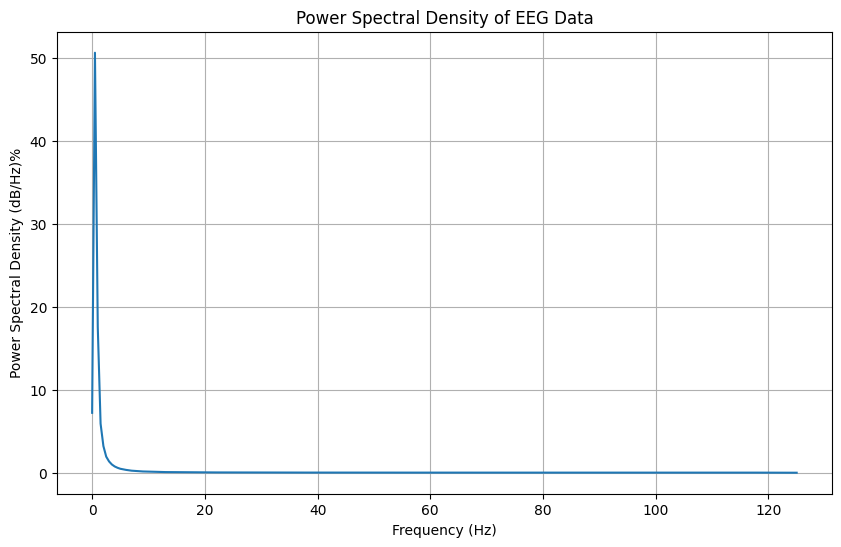

In [15]:

sf=250
no=2*sf
n_tapers = 4  # Number of tapers for multitaper PSD estimation
freqs, psds  = ss.welch(df['O1'], fs=sf,nperseg=no)
psds /= np.sum(psds, axis=-1, keepdims=True)
# scaling_factor = 1e-6
# psds = psds / scaling_factor

# Step 5: Plot the power spectral density (in original units)
psd_mean = np.mean(psds, axis=0)

# # Step 4: Plot the power spectral density
# psd_mean = np.mean(psds, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(freqs, psds*100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)%')
plt.title('Power Spectral Density of EEG Data')
plt.grid(True)
plt.show()


# Entropy

In [16]:
fp1_data = df.iloc[0:250, 0].values
fp2_data = df.iloc[0:250, 1].values
# Combine FP1 and FP2 data by averaging
eeg_data_frontal = (fp1_data + fp2_data) / 2

c3_data = df.iloc[0:250, 2].values
c4_data = df.iloc[0:250, 3].values
# Combine FP1 and FP2 data by averaging
eeg_data_central = (c3_data + c4_data) / 2

p3_data = df.iloc[0:250, 4].values
p4_data = df.iloc[0:250, 5].values
# Combine FP1 and FP2 data by averaging
eeg_data_parietal = (p3_data + p4_data) / 2

o1_data = df.iloc[0:250, 6].values
o2_data = df.iloc[0:250, 7].values
# Combine FP1 and FP2 data by averaging
eeg_data_occipital = (o1_data + o2_data) / 2





In [17]:
import numpy as np

def sample_entropy(data, m, r):
    N = len(data)
    B = 0.0
    A = 0.0

    # Calculate the maximum number of possible matches (B) and matches (A) for each pair of (m+1)-length vectors
    for i in range(N - m):
        for j in range(i + 1, N - m):
            if np.max(np.abs(data[i:i+m] - data[j:j+m])) <= r:
                B += 1
                if np.max(np.abs(data[i:i+m+1] - data[j:j+m+1])) <= r:
                    A += 1

    # Avoid division by zero
    if A == 0 or B == 0:
        return 0.0

    # Calculate sample entropy
    return -np.log(A / B)



In [19]:
m=2
sampen_frontal= sample_entropy(eeg_data_frontal,m=m,r=0.9 * np.std(eeg_data_frontal))
sampen_central=sample_entropy(eeg_data_central,m=m,r=0.9 * np.std(eeg_data_central))
sampen_parietal=sample_entropy(eeg_data_parietal,m=m,r=0.9 * np.std(eeg_data_parietal))
sampen_occipital=sample_entropy(eeg_data_occipital,m=m,r=0.9 * np.std(eeg_data_occipital))

combined_sampen = np.mean([sampen_frontal, sampen_central, sampen_parietal, sampen_occipital], axis=0)
combined_sampen

0.3172141167210273

In [20]:
def approximate_entropy(data, m, r):
    N = len(data)
    B = np.zeros(N - m)
    A = np.zeros(N - m)

    # Calculate the number of matches (A) for each m-length vector
    for i in range(N - m):
        for j in range(N - m):
            if i != j:
                if np.max(np.abs(data[i:i+m] - data[j:j+m])) <= r:
                    B[i] += 1
                    if np.max(np.abs(data[i:i+m+1] - data[j:j+m+1])) <= r:
                        A[i] += 1

    # Calculate the number of matches (A) for the m+1-length vector
    B_sum = np.sum(B)
    A_sum = np.sum(A)

    # Avoid division by zero
    if A_sum == 0 or B_sum == 0:
        return 0.0

    # Calculate approximate entropy
    return -np.log(A_sum / B_sum)

In [21]:
apen_frontal= approximate_entropy(eeg_data_frontal,m=m,r=0.9 * np.std(eeg_data_frontal))
apen_central=approximate_entropy(eeg_data_central,m=m,r=0.9 * np.std(eeg_data_central))
apen_parietal=approximate_entropy(eeg_data_parietal,m=m,r=0.9 * np.std(eeg_data_parietal))
apen_occipital=approximate_entropy(eeg_data_occipital,m=m,r=0.9 * np.std(eeg_data_occipital))

combined_apen = np.mean([apen_frontal, apen_central, apen_parietal, apen_occipital], axis=0)
combined_apen

0.3172141167210273

## Frequency Analysis

In [22]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Sample EEG signal data (replace this with your actual EEG data)
eeg_signal = df.iloc[0:250,0:8]# Replace this with your EEG signal data

# Choose the wavelet (e.g., Morlet wavelet)
wavelet = 'cmor'

# Define scales for the CWT (frequency range)
scales = np.arange(1, 128)  # You can adjust the range based on your frequency bands of interest

# Define the sampling frequency of the EEG signal (in Hz)
sampling_frequency = 256  # Replace this with your actual sampling frequency

# Perform the Continuous Wavelet Transform
coefficients, frequencies = pywt.cwt(eeg_signal, scales, wavelet)

# Convert the scales to frequencies in Hz
frequencies_hz = pywt.scale2frequency(wavelet, scales) * sampling_frequency

#ALPHA
# Define the frequency range for alpha band (8-12 Hz)
alpha_min = 8  # Minimum frequency for alpha band
alpha_max = 12 # Maximum frequency for alpha band
# Find the indices corresponding to the alpha frequency range
alpha_indices = np.where((frequencies_hz >= alpha_min) & (frequencies_hz <= alpha_max))[0]
# Extract the coefficients corresponding to alpha frequency range
alpha_coefficients = np.abs(coefficients[alpha_indices, :])
# Calculate the mean coefficient across all scales in the alpha band
alpha_mean_coefficients = np.mean(alpha_coefficients, axis=0)

#BETA
beta_min = 12
beta_max = 30 
beta_indices = np.where((frequencies_hz >= beta_min) & (frequencies_hz <= beta_max))[0]
beta_coefficients = np.abs(coefficients[beta_indices, :])
beta_mean_coefficients = np.mean(beta_coefficients, axis=0)

#GAMMA
gamma_min = 30
gamma_max = 100
gamma_indices = np.where((frequencies_hz >= gamma_min) & (frequencies_hz <= gamma_max))[0]
gamma_coefficients = np.abs(coefficients[gamma_indices, :])
gamma_mean_coefficients = np.mean(gamma_coefficients, axis=0)


#THETA
theta_min = 4
theta_max = 8
theta_indices = np.where((frequencies_hz >=theta_min) & (frequencies_hz <= theta_max))[0]
theta_coefficients = np.abs(coefficients[theta_indices, :])
theta_mean_coefficients = np.mean(theta_coefficients, axis=0)

C:\Users\PRAMILA\anaconda3\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
C:\Users\PRAMILA\anaconda3\lib\site-packages\pywt\_functions.py:142: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [23]:
frequencies_hz

array([128.        ,  64.        ,  42.66666667,  32.        ,
        25.6       ,  21.33333333,  18.28571429,  16.        ,
        14.22222222,  12.8       ,  11.63636364,  10.66666667,
         9.84615385,   9.14285714,   8.53333333,   8.        ,
         7.52941176,   7.11111111,   6.73684211,   6.4       ,
         6.0952381 ,   5.81818182,   5.56521739,   5.33333333,
         5.12      ,   4.92307692,   4.74074074,   4.57142857,
         4.4137931 ,   4.26666667,   4.12903226,   4.        ,
         3.87878788,   3.76470588,   3.65714286,   3.55555556,
         3.45945946,   3.36842105,   3.28205128,   3.2       ,
         3.12195122,   3.04761905,   2.97674419,   2.90909091,
         2.84444444,   2.7826087 ,   2.72340426,   2.66666667,
         2.6122449 ,   2.56      ,   2.50980392,   2.46153846,
         2.41509434,   2.37037037,   2.32727273,   2.28571429,
         2.24561404,   2.20689655,   2.16949153,   2.13333333,
         2.09836066,   2.06451613,   2.03174603,   2.  

In [24]:
alpha_mean_coefficients.shape

(250, 8)

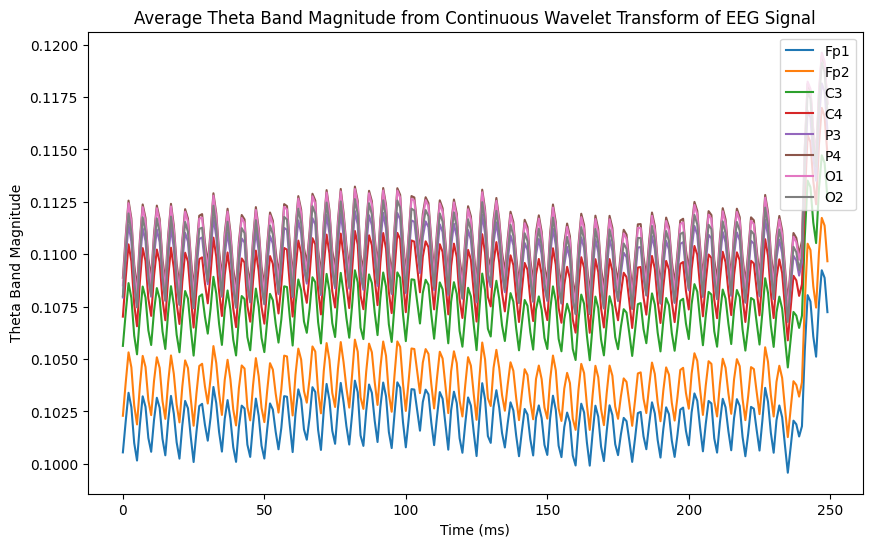

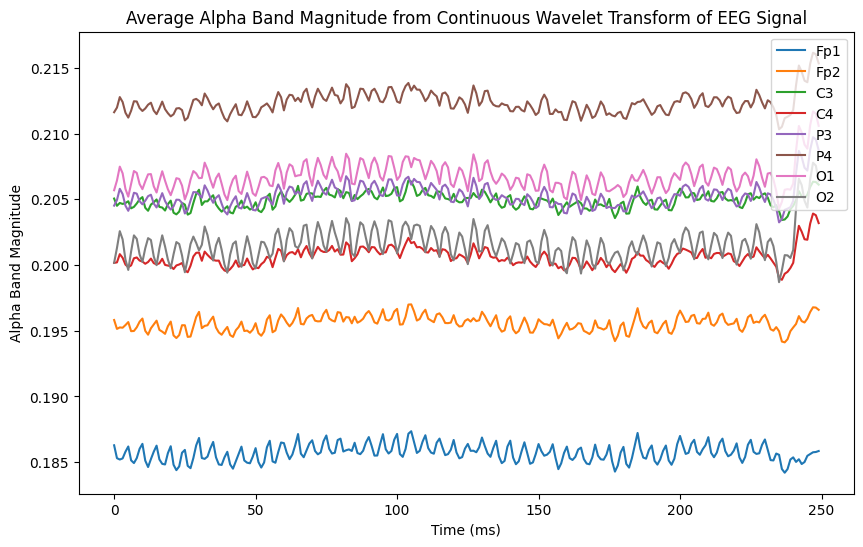

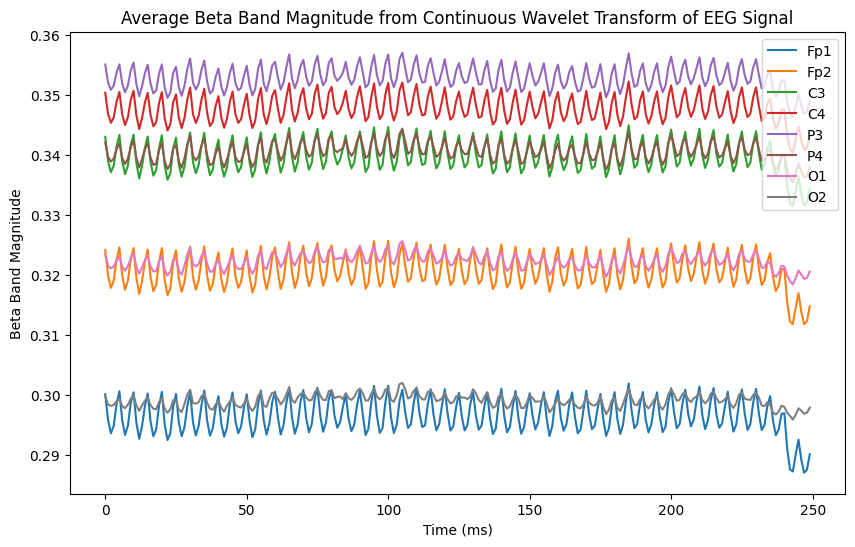

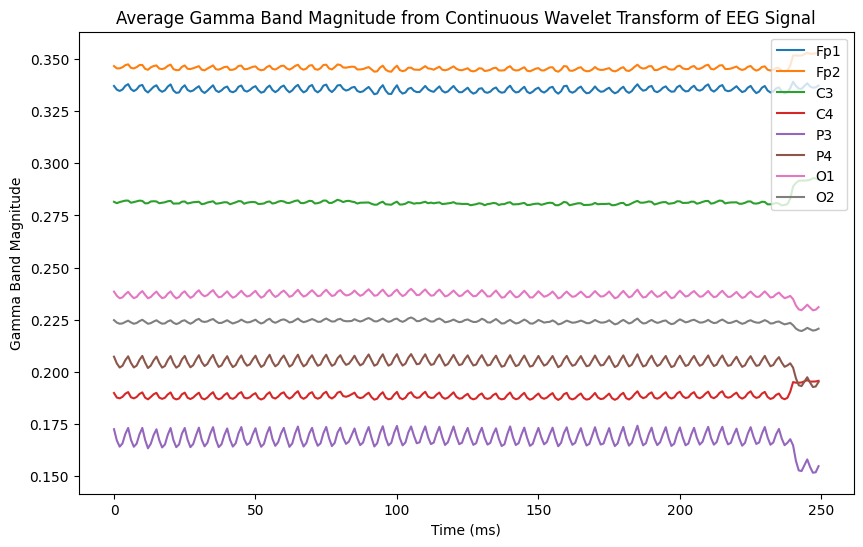

In [25]:
#theta

column= ['Fp1','Fp2','C3','C4','P3','P4','O1','O2']   

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(eeg_signal)), theta_mean_coefficients,label=column)
plt.xlabel('Time (ms)')
plt.ylabel('Theta Band Magnitude')
plt.title('Average Theta Band Magnitude from Continuous Wavelet Transform of EEG Signal')
plt.legend(loc='upper right')

plt.show()

#alpha
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(eeg_signal)), alpha_mean_coefficients,label=column)
plt.xlabel('Time (ms)')
plt.ylabel('Alpha Band Magnitude')
plt.title('Average Alpha Band Magnitude from Continuous Wavelet Transform of EEG Signal')
plt.legend(loc='upper right')

plt.show()

#beta
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(eeg_signal)), beta_mean_coefficients,label=column)
plt.xlabel('Time (ms)')
plt.ylabel('Beta Band Magnitude')
plt.title('Average Beta Band Magnitude from Continuous Wavelet Transform of EEG Signal')
plt.legend(loc='upper right')
 
plt.show()

#gamma
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(eeg_signal)), gamma_mean_coefficients,label=column)
plt.xlabel('Time (ms)')
plt.ylabel('Gamma Band Magnitude')
plt.title('Average Gamma Band Magnitude from Continuous Wavelet Transform of EEG Signal')
plt.legend(loc='upper right')

plt.show()
